In [12]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
#흑백 이미지 데이터는 픽셀 하나당 0-255까지의 숫자값을 가지므로 이를 255로 나누면 0-1 사이로 normalize됩니다.
x_train /= 255.0
x_test /= 255.0
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [13]:
def baseline_model():
    model = Sequential()
    model.add(Dense(units=64, input_dim=28*28, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [14]:
def tuning_model_1():
    model = Sequential()
    model.add(Dense(units=64, input_dim=28*28, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [16]:
# build the model
model = baseline_model()
# model = tuning_model_1()
# model = tuning_model_2()
# model = tuning_model_3()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# test_loss_and_accuracy = model.evaluate(x_test, y_test, batch_size=32)
# print('test_loss_and_accuracy : ' + str(test_loss_and_accuracy))

test_results = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
# print(type(test_results))
# print(test_results)
# print(test_results[0])
# print(test_results[1])
print("Baseline Error: %.2f%%" % (100-test_results[1]*100))

Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1141 - acc: 0.9682
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1108 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1074 - acc: 0.9701
Epoch 4/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1046 - acc: 0.9708
Epoch 5/5
10000/10000 [==============================] - 0s 9us/step
<class 'list'>
[0.11376074719913304, 0.966]
0.11376074719913304
0.966
Baseline Error: 3.40%


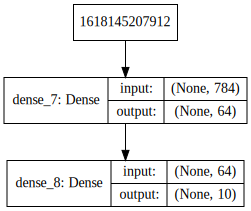

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
#출처: https://3months.tistory.com/150
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [13]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')